# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [78]:
%matplotlib inline

import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns
from plotly import express as px
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import plot_tree, export_text
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, f1_score, plot_roc_curve
from sklearn.decomposition import PCA
import re # regex
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn import svm


ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (c:\Users\rober\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\__init__.py)

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', parser='auto')
X, y = mnist.data, mnist.target


In [ ]:
y.value_counts()

class
1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: count, dtype: int64

In [ ]:
data = {'X': X}

def print_exploratory(data):
    print("Data shape: \n")
    for name, d in data.items():
        num_rows, num_columns = d.shape
        print(f'Shape of "{name}" : {num_columns} columns, {num_rows} rows')
    print("\n Duplicates:\n")
    for name, d in data.items():
        num_duplicates = d.duplicated().sum()
        print(f'Number of duplicates in "{name}" : {num_duplicates} duplicates')
    print("\n")
    for name, d in data.items():    
        unique_v = d.nunique()
        print(f'Unique Values "{name}":\n{unique_v}\n')
    for name, d in data.items():    
        typ = d.dtypes
        print(f'Data Type "{name}":\n{typ}\n')
    for name, d in data.items():    
        empty = d.isna().sum()
    for name, d in data.items():
        num_columns = d.select_dtypes(np.number).columns
        str_columns = d.select_dtypes(object).columns
        print(f'Numerical Columns "{name}": \n{num_columns}\n ')
        print(f'Non numerical Columns "{name}": \n{str_columns}\n ')
        

print_exploratory(data)


Data shape: 

Shape of "X" : 784 columns, 70000 rows

 Duplicates:



Number of duplicates in "X" : 0 duplicates


Unique Values "X":
pixel1      1
pixel2      1
pixel3      1
pixel4      1
pixel5      1
           ..
pixel780    3
pixel781    1
pixel782    1
pixel783    1
pixel784    1
Length: 784, dtype: int64

Data Type "X":
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
pixel5      int64
            ...  
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
Length: 784, dtype: object

Numerical Columns "X": 
Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=784)
 
Non numerical Columns "X": 
Index([], dtype='object')
 


### Now take a look at the shapes of the X and y matricies 

In [ ]:
# np.array(somedataseries) 
# iloc

y.shape

(70000,)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [ ]:

digit_36000 = X.iloc[35999]  # For Pandas DataFrame

digit_36000["pixel500"]


0

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

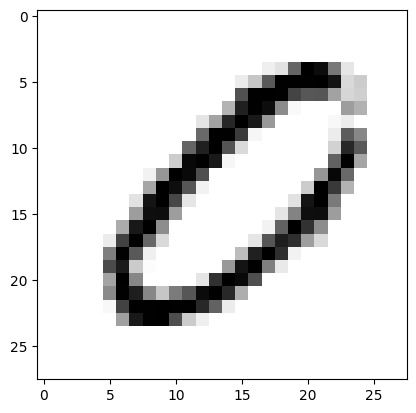

In [ ]:

digit_36000 = X.iloc[35999].values.reshape(28, 28)  # For Pandas DataFrame

plt.imshow(digit_36000, cmap=plt.cm.binary, interpolation="nearest")
plt.show()

In [ ]:
def print_overall_max_min_values(dataframe):
    overall_max_value = dataframe.values.max()
    overall_min_value = dataframe.values.min()
    print(f"Overall Max Value: {overall_max_value}")
    print(f"Overall Min Value: {overall_min_value}")

print_overall_max_min_values(X)


Overall Max Value: 255
Overall Min Value: 0


### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [ ]:
digit_36000 = y.iloc[35999]
digit_36000

'0'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [ ]:
num_train_entries = 60000
X_train = X[:num_train_entries]
y_train = y[:num_train_entries]
X_test = X[num_train_entries:]
y_test = y[num_train_entries:]


In [ ]:
print((y_train == '5').sum())
print((y_test == '5').sum())


5421
892


### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [ ]:
y_train = y_train.apply(lambda x: 1 if x == "5" else 0)
y_train.value_counts()

class
0    54579
1     5421
Name: count, dtype: int64

In [ ]:
y_test = y_test.apply(lambda x: 1 if x == "5" else 0)
y_test.value_counts()

class
0    9108
1     892
Name: count, dtype: int64

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [ ]:
def scaler_data(X_train, X_test,y_train, y_test):
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    X_train = pd.DataFrame(X_train, columns=X.columns)
    X_test = pd.DataFrame(X_test, columns=X.columns)
    y_train = y_train.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = scaler_data(X_train, X_test, y_train, y_test)

In [ ]:
print_overall_max_min_values(X_train)

Overall Max Value: 1.0
Overall Min Value: 0.0


In [ ]:
print_overall_max_min_values(X_test)

Overall Max Value: 1.0
Overall Min Value: 0.0


c:\Users\rober\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score: 0.9781
accuracy score: 0.9781
precision_score: 0.9169764560099133
recall_score: 0.8295964125560538
740


C:\Users\rober\AppData\Local\Temp\ipykernel_12548\1864932120.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_result],axis=0)


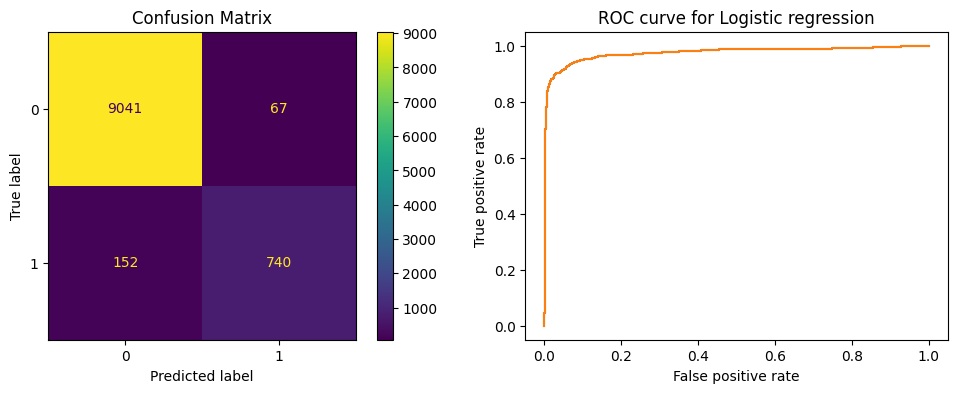

In [ ]:
results = pd.DataFrame(columns=['model_name','accuracy','precision','recall','f1_score', 'false_negatives'])

model_name = "Logistic regression"
model = LogisticRegression()

def print_y_score(model_name, X_test, y_test):
    Y_score = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, Y_score)
    plt.title(f"ROC curve for {model_name}")
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.plot(fpr, tpr);

def fit_predict_evaluate_fonction(model_name, model, X_train, X_test, y_train, y_test, results):
    # fit predicts and evalueate model and add results to a table results
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    score = model.score(X_test, y_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    # Recall
    #(y_pred & y_test).sum() / y_test.sum()
    print(f"score: {score}")
    print(f"accuracy score: {accuracy}")
    print(f"precision_score: {precision}")
    print(f"recall_score: {recall}")
    confusion_matr = confusion_matrix(y_test, y_pred)
    print((y_pred & y_test).sum())
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    disp = ConfusionMatrixDisplay(confusion_matr, display_labels=model.classes_)
    disp.plot(ax=ax1)
    ax1.set_title('Confusion Matrix')
    
    #model_evaluation:
    f1 = f1_score(y_test, y_pred)
    false_negatives = confusion_matr[1][0]
    new_result = pd.DataFrame({'model_name': model_name,'accuracy': accuracy,'precision':precision,'recall':recall,'f1_score':f1,'false_negatives':false_negatives},index=[0])   
    results = pd.concat([results, new_result],axis=0)
    print_y_score(model_name, X_test, y_test)
    return accuracy, precision, recall, y_pred, results

accuracy, precision, recall, y_pred_lr, results = fit_predict_evaluate_fonction(model_name, model, X_train, X_test, y_train, y_test, results)

results



print_y_score(model_name, X_test, y_test)

In [ ]:
y_predict_train = model.predict(X_train)

In [ ]:
results

,model_name,accuracy,precision,recall,f1_score,false_negatives
0,Logistic regression,0.9781,0.916976,0.829596,0.871101,152


### Does the classifier predict correctly the 36000th digit we picked before?

In [ ]:
y_predict_train[35999] # yes, it`s not a 5, but the model trained on this data,so...

0

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [ ]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()



### Now lets fit and predict on the testing set using our never 5 Classifier

c:\Users\rober\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


score: n/a
accuracy score: 0.9108
precision_score: 0.0
recall_score: 0.0


AttributeError: 'Never5Classifier' object has no attribute 'predict_proba'

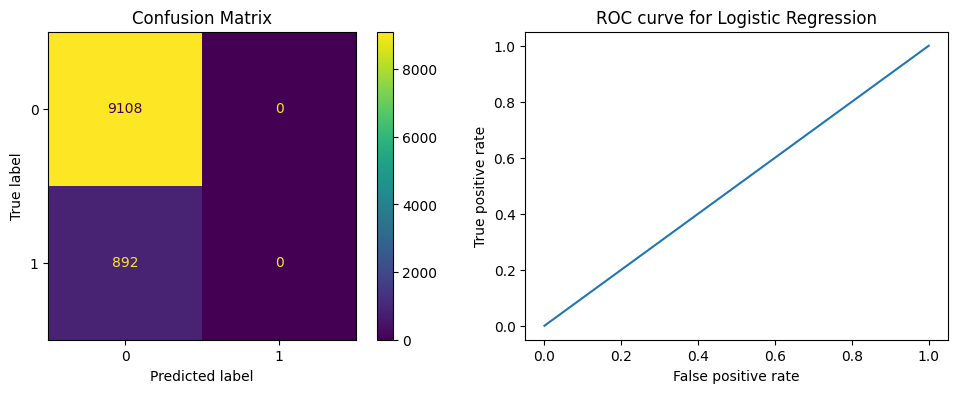

In [ ]:
model = never_5_clf
model_name = "Never5Classifier"
model.fit(X_train, y_train)
y_pred_never_5 = model.predict(X_test)



Y_score = (y_pred_never_5 == 1).astype(float)

    
accuracy = accuracy_score(y_test, y_pred_never_5)
score = "n/a"
precision = precision_score(y_test, y_pred_never_5)
recall = recall_score(y_test, y_pred_never_5)
    # Recall
    #(y_pred & y_test).sum() / y_test.sum()
print(f"score: {score}")
print(f"accuracy score: {accuracy}")
print(f"precision_score: {precision}")
print(f"recall_score: {recall}")
confusion_matr = confusion_matrix(y_test, y_pred_never_5)
# print((y_pred & y_test).sum())
    # Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
disp = ConfusionMatrixDisplay(confusion_matr)
disp.plot(ax=ax1)
fpr, tpr, thresholds = roc_curve(y_test, Y_score)
ax1.set_title('Confusion Matrix')
plt.title("ROC curve for Logistic Regression")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.plot(tpr, fpr)
    
    #model_evaluation:
f1 = f1_score(y_test, y_pred_never_5)
false_negatives = confusion_matr[1][0]
new_result = pd.DataFrame({'model_name': model_name,'accuracy':accuracy,'precision':precision,'recall':recall,'f1_score':f1,'false_negatives':false_negatives},index=[0])   
results = pd.concat([results, new_result],axis=0)
print_y_score(model_name, X_test, y_test)
    

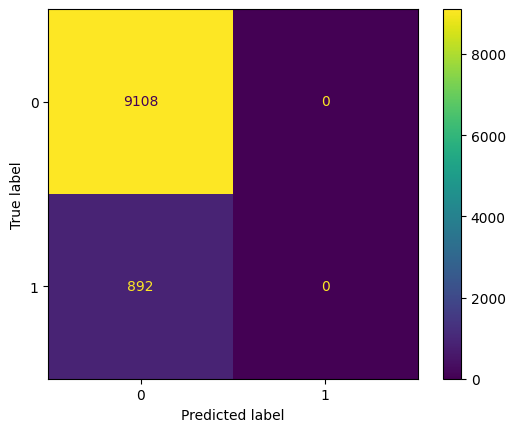

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_never_5)).plot()

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [ ]:
# f1_score of the first model is 0.871101, and for the second model is 	0.000000

results

,model_name,accuracy,precision,recall,f1_score,false_negatives
0,Logistic regression,0.9781,0.916976,0.829596,0.871101,152
0,Never5Classifier,0.9108,0.000000,0.000000,0.000000,892


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [ ]:
# the recall of the second model is 0, it predicts everything to negative, so it has somme accuracy but no precision and a high number of false negatives

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

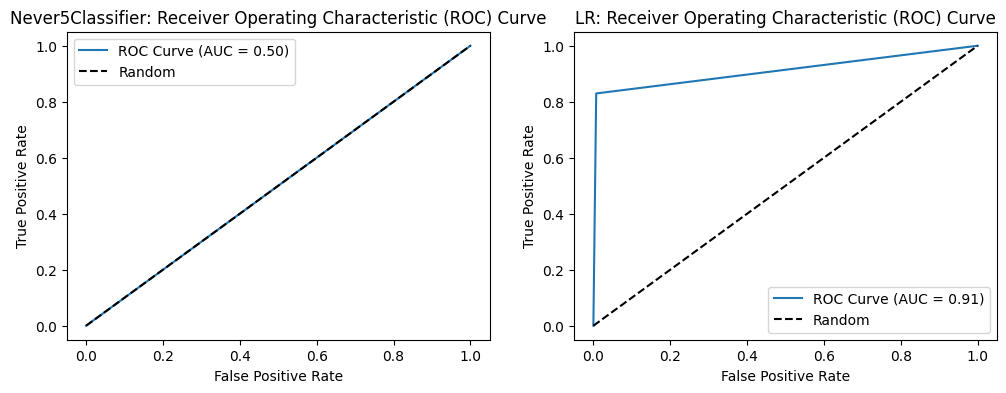

In [91]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))


y_pred_prob_never5 = (y_pred_never_5 == 1).astype(float)
fpr_never5, tpr_never5, _ = roc_curve(y_test, y_pred_prob_never5)
roc_auc_never5 = roc_auc_score(y_test, y_pred_prob_never5)

ax1.plot(fpr_never5, tpr_never5, label=f'ROC Curve (AUC = {roc_auc_never5:.2f})')
ax1.plot([0, 1], [0, 1], 'k--', label='Random')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Never5Classifier: Receiver Operating Characteristic (ROC) Curve')
ax1.legend()


y_pred_prob_lr = (y_pred_lr == 1).astype(float)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_prob_lr)

ax2.plot(fpr_lr, tpr_lr, label=f'ROC Curve (AUC = {roc_auc_lr:.2f})')
ax2.plot([0, 1], [0, 1], 'k--', label='Random')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('LR: Receiver Operating Characteristic (ROC) Curve')
ax2.legend()


plt.show()


In [ ]:
# the Roc Curve is equal to the random line, it suggests a random classifier (is not predicting anything more than random choices)

### Now find the roc_auc_score for each. 

In [100]:
print(f"roc_auc_score LR : {roc_auc_lr}")
print(f"roc_auc_score Never5: {roc_auc_never5}")

roc_auc_score LR : 0.9111201210782026
roc_auc_score Never5: 0.5


### What does this metric tell you? Which classifier works better with this metric in mind?

In [ ]:
# Never5 Roc Score is equal to a score of a random model, it doesn`t predict anything, model's ability to distinguish between two classes is zero
# LR model score is 0.91, 0.9 to 1.0 is a Excellent performance for a of a binary classification model